In [69]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ujson
from collections import OrderedDict

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [378]:
dataFiles = {}
dataFiles["Authors"] = ["BioMed_AuthorsData.json","Physics_AuthorsData.json"];
dataFiles["Total Authors"] = ["BioMed_TotalAuthorsData.json","Physics_TotalAuthorsData.json"]
dataFiles["Citations"] = ["BioMed_CitationsData.json","Physics_CitationsData.json"]
# dataFiles["Total Citations"] = ["BioMed_CumulativeCitationsData.json","Physics_CumulativeCitationsData.json"]
dataFiles["Publications"] = ["BioMed_PublicationsData.json","Physics_PublicationsData.json"]
dataFiles["Total Affiliations"] = ["BioMed_TotalAffiliationsData.json","Physics_TotalAffiliationsData.json"]
dataFiles["Affiliations"] = ["BioMed_AffiliationsData.json","Physics_AffiliationsData.json"]

#TODO: Fix HuBMap -> HuBMAP

projectColors = OrderedDict([
    ('BaBar',np.array([27,158,119])/255.0),
    ('LIGO',np.array([166,86,40])/255.0),
    ('ATLAS',np.array([231,41,138])/255.0),
    ('IceCube',np.array([55,126,184])/255.0),
    ('HGP',np.array([255,127,0])/255.0),
    ('HuBMAP+HCA',np.array([228,26,28])/255.0),
    ]
)

projectStart = {
    'BaBar'     : 1995,
    'LIGO'      : 1991,
    'ATLAS'     : 1997,
    'IceCube'   : 2004,
    'HGP'       : 1988,
    'HuBMAP+HCA': 2017,
}

propertyStyles = OrderedDict([
    ('Publications',"-"),
    ('Citations',"-."),
    ('Authors',":"),
    ('Affiliations',"--"),
    ]
)

constructionPhase = "Co"
researchPhase = "Re"
closurePhase = "Cl"
upgradePhase = "Up"
prototypingPhase = "Pr"
planningPhase = "Pl"
dataPhase = "Da"


projectStages = {
  "BaBar":[
    (constructionPhase,(1995,1999)),
    (researchPhase,(1999,2008)),
    (closurePhase,(2008,2020))
  ],
  "Virgo-LIGO":1990,
  "Virgo":[
    (constructionPhase,(1996,2003)),
    (researchPhase,(2003,2011)),
    (upgradePhase,(2011,2017)),
    (researchPhase,(2017,2020)),
  ],
  "LIGO":[
    (planningPhase,(1991,1994)),
    (constructionPhase,(1994,2003)),
    (researchPhase,(2003,2008)),
    (upgradePhase,(2008,2014)),
    (researchPhase,(2014,2020)),
  ],
  "ATLAS":[
    (planningPhase,(1992,1998)),
    (constructionPhase,(1998,2007)),
    (researchPhase,(2007,2013)),
    (upgradePhase,(2013,2015)),
    (researchPhase,(2015,2020)),
  ],
  "IceCube":[
    (prototypingPhase,(2000,2005)),
    (constructionPhase,(2005,2011)),
    (researchPhase,(2011,2020)),
  ],
  "HGP":[
    (planningPhase,(1988,1994)),
    (prototypingPhase,(1994,1999)),
    (researchPhase,(1999,2003)),
    (closurePhase,(2003,2020)),
  ],
  "HuBMAP+HCA":[
    (planningPhase,(2016,2017)),
    (prototypingPhase,(2017,2018)),
    (dataPhase,(2018,2020)),
   ]
}

stageColors = [
  np.array([110,110,110])/255.0,
  np.array([210,140,92])/255.0,
  np.array([100,110,170])/255.0,
  np.array([180,90,110])/255.0,
  np.array([110,140,100])/255.0,
]

plotData = {}
for propertyName,filenames in dataFiles.items():
    plotData[propertyName] = {}
    for filename in filenames:
        with open("../../Data/PlotData/%s"%filename,"rt") as fd:
            projectsData = ujson.load(fd)
            if("HCA+HuBMap" in projectsData):
                projectsData["HuBMAP+HCA"] = projectsData["HCA+HuBMap"]
            elif ("HuBMap+HCA" in projectsData):
                projectsData["HuBMAP+HCA"] = projectsData["HuBMap+HCA"]
            plotData[propertyName].update(projectsData)


plotData["Total Publications"] = {}
for projectName,(years,counts) in plotData["Publications"].items():
    plotData["Total Publications"][projectName] = [years,np.cumsum(counts).tolist()]
    
plotData["Total Citations"] = {}
for projectName,(years,counts) in plotData["Citations"].items():
    plotData["Total Citations"][projectName] = [years,np.cumsum(counts).tolist()]

In [238]:
smoothingWindow=3
len(np.convolve([1,1,1,2,2,2], np.ones(N)/N, mode='valid'))

4

In [262]:
def first_nonzero(arr):
    return (np.array(arr)!=0).argmax(axis=0)

def last_nonzero(arr):
    return np.max(np.nonzero(np.array(arr)))

print(counts)
first = first_nonzero(counts);
last = last_nonzero(counts);
print(counts[first:(last+1)])

[40, 36, 87, 90]
[40, 36, 87, 90]


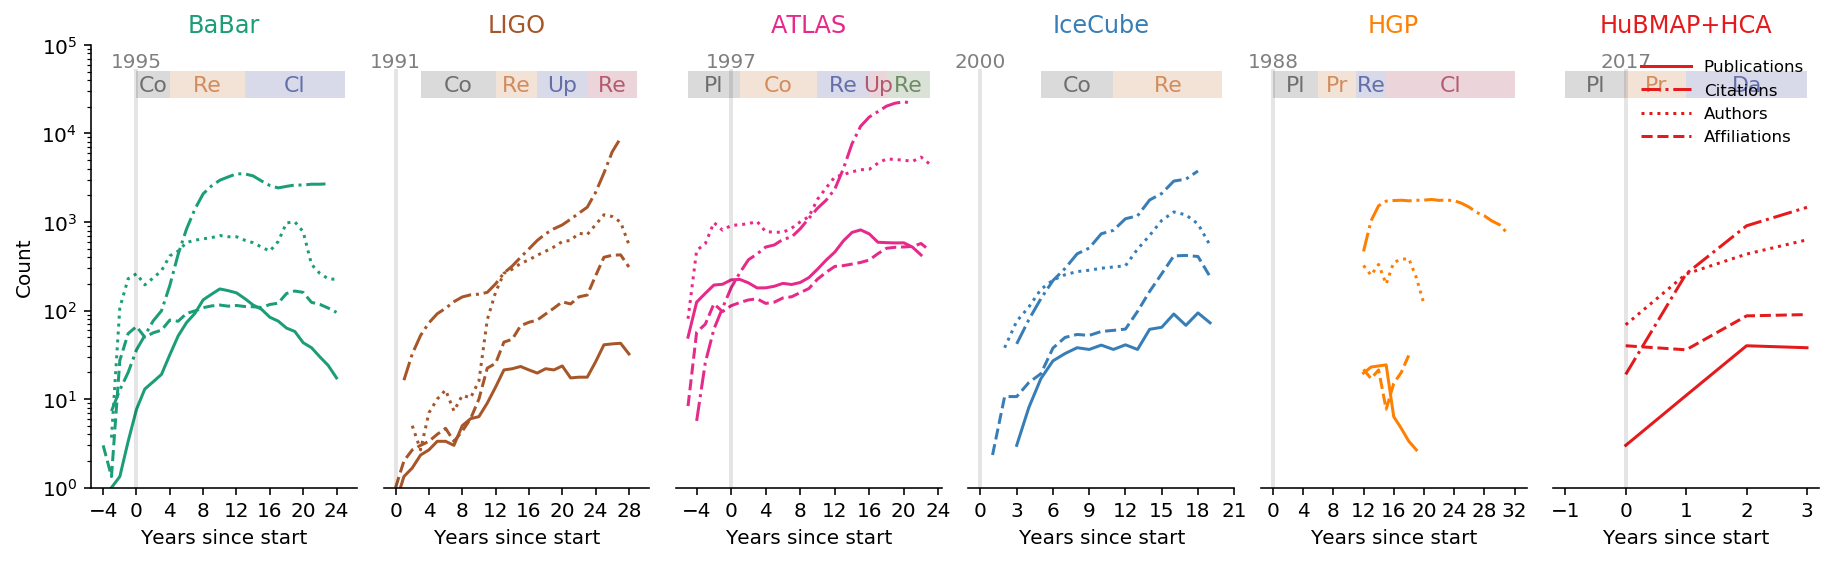

In [367]:
gr = 1.61803398875*0.95
figScale = 2;
fig = plt.figure(figsize=(figScale*6,figScale*gr))

prefix = ""
for projectIndex,projectName in enumerate(projectColors):
    ax = plt.subplot(1,len(projectColors),1+projectIndex)
    for propertyIndex,propertyName in enumerate(propertyStyles):
        years,counts = plotData[prefix+propertyName][projectName]
        first = first_nonzero(counts);
        last = last_nonzero(counts);
        years = years[first:(last+1)]
        counts = counts[first:(last+1)]
        
        if(len(counts)>2*smoothingWindow):
            counts = np.convolve(counts, np.ones(N)/N, mode='valid')
            years = years[1:-1]
        ax.plot(np.array(years)-projectStart[projectName],counts,propertyStyles[propertyName],color=projectColors[projectName],label=propertyName)
    if(projectIndex==0):
        ax.set_ylabel("Count")
    ax.set_xlabel("Years since start")
    if(projectName in projectStages):
        projectStartYear = projectStart[projectName]
        stages = projectStages[projectName];
        for stageIndex,(stageName,(stageStart,stageEnd)) in enumerate(stages):
            ax.axvspan(stageStart-projectStartYear, stageEnd-projectStartYear, color=stageColors[stageIndex], alpha=0.25,
                       lw=0,ymin=0.88,ymax=0.94)
#             if(stageIndex%2==0):
#                 textPosition = 0.88
#                 textAlign = "top"
#             else:
#                 textPosition = 0.93
#                 textAlign = "bottom"
            textPosition = 0.909
            textAlign = "center"
            ax.text((stageStart+stageEnd)/2.0-projectStartYear,
                    textPosition, stageName,
                    color=stageColors[stageIndex],
                    horizontalalignment='center',verticalalignment=textAlign,
                    fontsize=11,
                    transform=ax.get_xaxis_transform())
 


#         plt.ylim(0,np.max(totalsByYear)*1.5)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yscale("log")
    ax.set_ylim(1,10**5)
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    if(projectIndex!=0):
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
        ax.tick_params(axis='y', which='both', length=0)
#     else:
#         ax.xaxis.set_ticks_position('left')
        
#     ax.xaxis.set_ticks_position('left')
    ax.axvline(0,0.0,0.94,linewidth=2, color='k',alpha=0.1)
    ax.text(0,0.95,str(projectStart[projectName]),ha="center", color='k',alpha=0.5,transform=ax.get_xaxis_transform())
    if(projectIndex==len(projectColors)-1):
        ax.legend(handlelength=3,loc='upper right',fontsize="small",frameon=False)
#     # Only show ticks on the left and bottom spines
#     ax.xaxis.set_ticks_position('bottom')
    ax.set_title(projectName,c=projectColors[projectName])
plt.subplots_adjust(wspace=0.10,bottom=0.0,left=0.00,right=1.0,top=1.0)

plt.show()

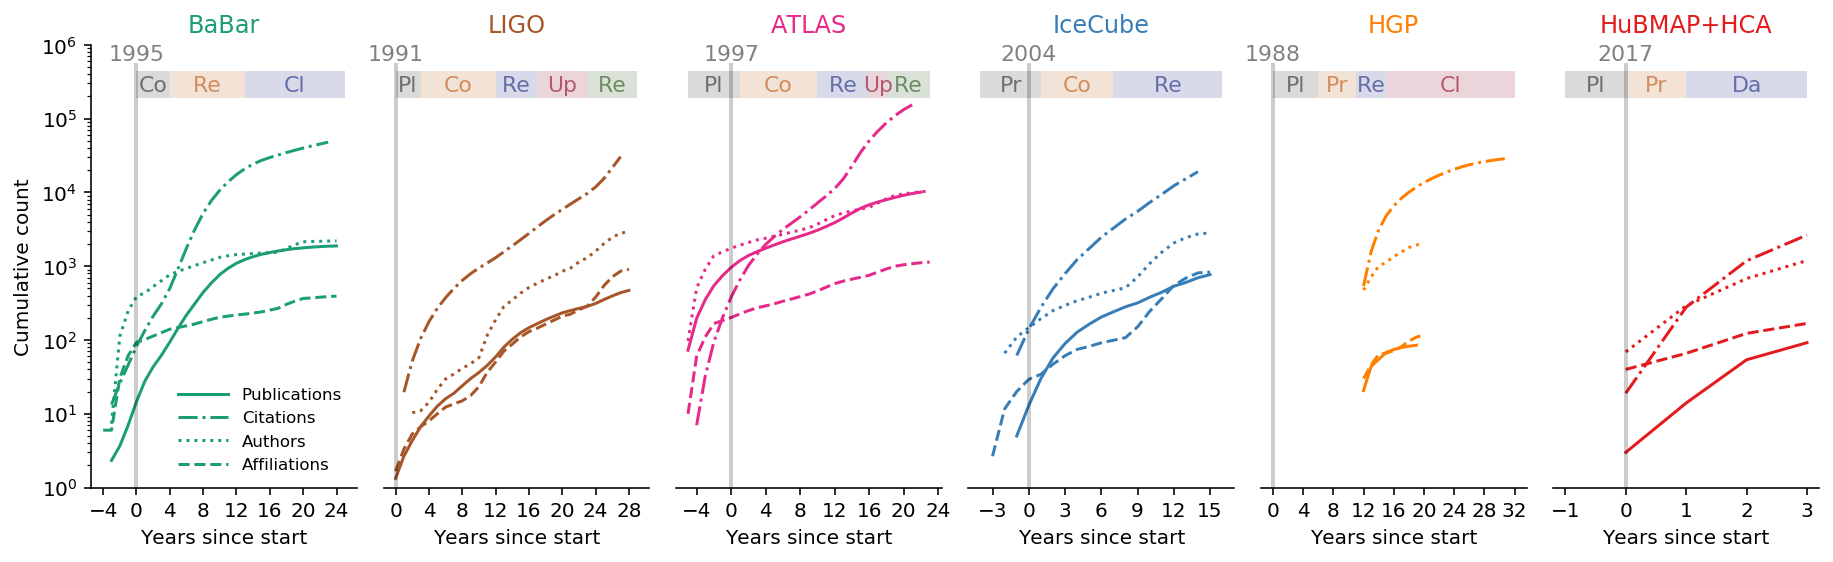

In [386]:
gr = 1.61803398875*0.95
figScale = 2;
fig = plt.figure(figsize=(figScale*6,figScale*gr))

prefix = "Total "
for projectIndex,projectName in enumerate(projectColors):
    ax = plt.subplot(1,len(projectColors),1+projectIndex)
    for propertyIndex,propertyName in enumerate(propertyStyles):
        years,counts = plotData[prefix+propertyName][projectName]
        first = first_nonzero(counts);
        last = last_nonzero(counts);
        years = years[first:(last+1)]
        counts = counts[first:(last+1)]
        
        if(len(counts)>2*smoothingWindow):
            counts = np.convolve(counts, np.ones(N)/N, mode='valid')
            years = years[1:-1]
        ax.plot(np.array(years)-projectStart[projectName],counts,propertyStyles[propertyName],color=projectColors[projectName],label=propertyName)
    if(projectIndex==0):
        ax.set_ylabel("Cumulative count")
    ax.set_xlabel("Years since start")
    if(projectName in projectStages):
        projectStartYear = projectStart[projectName]
        stages = projectStages[projectName];
        for stageIndex,(stageName,(stageStart,stageEnd)) in enumerate(stages):
            ax.axvspan(stageStart-projectStartYear, stageEnd-projectStartYear, color=stageColors[stageIndex], alpha=0.25,
                       lw=0,ymin=0.88,ymax=0.94)
#             if(stageIndex%2==0):
#                 textPosition = 0.88
#                 textAlign = "top"
#             else:
#                 textPosition = 0.93
#                 textAlign = "bottom"
            textPosition = 0.909
            textAlign = "center"
            ax.text((stageStart+stageEnd)/2.0-projectStartYear,
                    textPosition, stageName,
                    color=stageColors[stageIndex],
                    horizontalalignment='center',verticalalignment=textAlign,
                    fontsize=11,
                    transform=ax.get_xaxis_transform())
 


#         plt.ylim(0,np.max(totalsByYear)*1.5)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yscale("log")
    ax.set_ylim(1,10**6)
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    if(projectIndex!=0):
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
        ax.tick_params(axis='y', which='both', length=0)
#     else:
#         ax.xaxis.set_ticks_position('left')
        
#     ax.xaxis.set_ticks_position('left')
    ax.axvline(0,0.0,0.955,linewidth=2, color='k',alpha=0.2)
    ax.text(0,0.965,str(projectStart[projectName]),fontsize=11,ha="center", color='k',alpha=0.5,transform=ax.get_xaxis_transform())
    if(projectIndex==0):
        ax.legend(handlelength=3,loc='lower right',fontsize="small",frameon=False)
#     # Only show ticks on the left and bottom spines
#     ax.xaxis.set_ticks_position('bottom')
    ax.set_title(projectName,c=projectColors[projectName])
plt.subplots_adjust(wspace=0.10,bottom=0.0,left=0.00,right=1.0,top=1.0)
plt.savefig("../../Figures/allprojectsPlot.pdf")
plt.show()